In [14]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('bbc_text_cls.csv')

# Inspect the data
print(df.head())



                                                text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business


In [15]:
# Inspect the data
print(df['labels'].value_counts())  # Use 'labels' instead of 'label'


labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [16]:
# Preprocessing
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

df['text'] = df['text'].apply(preprocess_text)

# Encode labels
encoder = LabelEncoder()
df['targets'] = encoder.fit_transform(df['labels'])

In [17]:
# Split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['targets'])
df_valid, df_test = train_test_split(df_test, test_size=0.5, random_state=42, stratify=df_test['targets'])


In [18]:
# Tokenization and Padding
MAX_VOCAB_SIZE = 2000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])

data_train = tokenizer.texts_to_sequences(df_train['text'])
data_valid = tokenizer.texts_to_sequences(df_valid['text'])
data_test = tokenizer.texts_to_sequences(df_test['text'])

T = max(len(x) for x in data_train)  # Maximum sequence length
data_train = tf.keras.preprocessing.sequence.pad_sequences(data_train, maxlen=T)
data_valid = tf.keras.preprocessing.sequence.pad_sequences(data_valid, maxlen=T)
data_test = tf.keras.preprocessing.sequence.pad_sequences(data_test, maxlen=T)

In [19]:
# Build the model
D = 50  # Embedding dimensionality
K = df['targets'].nunique()  # Number of classes

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_VOCAB_SIZE, D, input_length=T),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(K, activation='softmax')
])

In [20]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(data_train, df_train['targets'], epochs=10, validation_data=(data_valid, df_valid['targets']))

# Evaluate the model
score = model.evaluate(data_test, df_test['targets'], verbose=0)
print(f'Test Loss: {score[0]:.4f}')
print(f'Test Accuracy: {score[1]:.4f}')

# Predictions
y_pred = model.predict(data_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report and confusion matrix
print(classification_report(df_test['targets'], y_pred_classes, target_names=encoder.classes_))
cm = confusion_matrix(df_test['targets'], y_pred_classes)

Epoch 1/10
56/56 [==============================] - 37s 576ms/step - loss: 1.5751 - accuracy: 0.2904 - val_loss: 1.5094 - val_accuracy: 0.4730
Epoch 2/10
56/56 [==============================] - 32s 581ms/step - loss: 1.4095 - accuracy: 0.5663 - val_loss: 1.2591 - val_accuracy: 0.8198
Epoch 3/10
56/56 [==============================] - 35s 631ms/step - loss: 1.0692 - accuracy: 0.7663 - val_loss: 0.7875 - val_accuracy: 0.8964
Epoch 4/10
56/56 [==============================] - 31s 561ms/step - loss: 0.6479 - accuracy: 0.8669 - val_loss: 0.4235 - val_accuracy: 0.9324
Epoch 5/10
56/56 [==============================] - 30s 540ms/step - loss: 0.4241 - accuracy: 0.8994 - val_loss: 0.2769 - val_accuracy: 0.9459
Epoch 6/10
56/56 [==============================] - 32s 569ms/step - loss: 0.3050 - accuracy: 0.9360 - val_loss: 0.2106 - val_accuracy: 0.9640
Epoch 7/10
56/56 [==============================] - 2162s 39s/step - loss: 0.2259 - accuracy: 0.9455 - val_loss: 0.1767 - val_accuracy: 0.9595

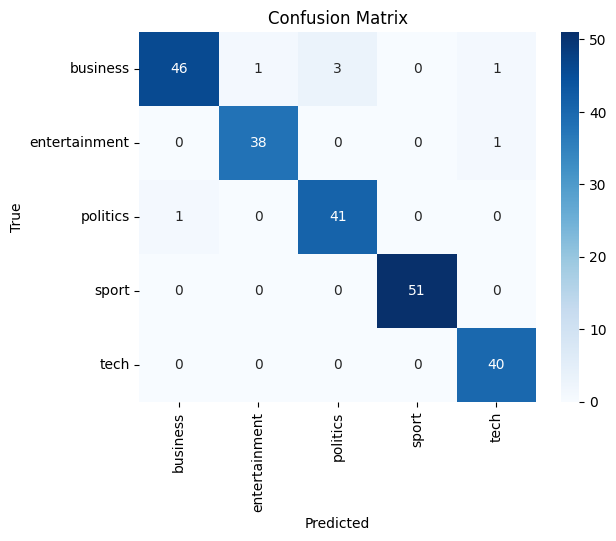

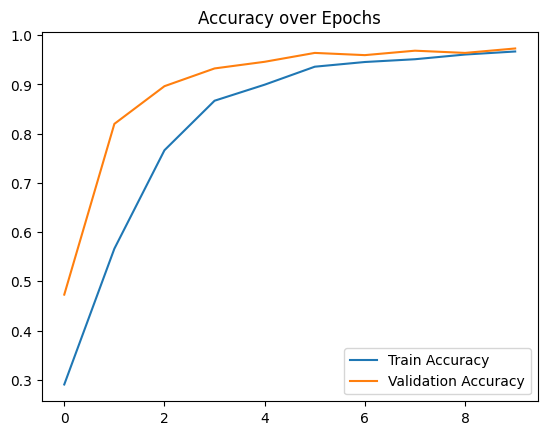

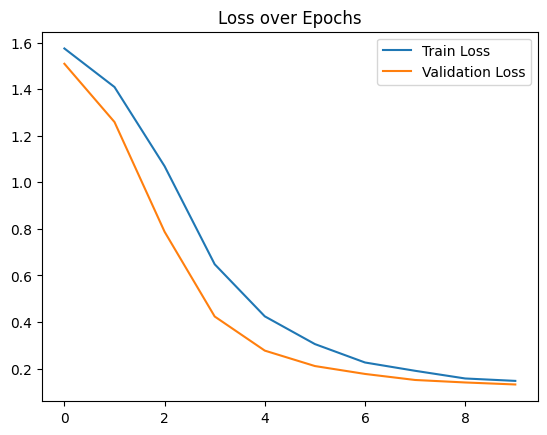

In [21]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [24]:
import os
print(os.getcwd())


C:\Users\Ashish Verma


In [30]:
import os

# List all files in the specified directory
files = os.listdir(r"C:\Users\Ashish Verma")
print(files)


['.anaconda', '.android', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.VirtualBox', '1_loan_approval_dataset - 1_loan_approval_dataset.csv', '2023msbda004 , loan_approval_dataset ,problem-1 .ipynb', 'agglomerative clustering.ipynb', 'anaconda3', 'AppData', 'Application Data', 'Ashish Verma  2023MSBDA004.ipynb', 'bank', 'bank-additional.zip', 'bank-full.csv', 'bbc_news_classifier.ipynb', 'bbc_text_cls.csv', 'CART.ipynb', 'CC GENERAL.csv', 'Churn_Modelling.csv', 'Contacts', 'Cookies', 'data.csv', 'Dataset.csv', 'Documents', 'Downloads', 'eeg-brain-signals-emotion-classification (1) (2).ipynb', 'Favorites', 'feature_importance.csv', 'fraud dataset analysis-Copy1.ipynb', 'fraud dataset analysis.ipynb', 'Fraud.csv', 'GradientBoosting_best_model.pkl', 'income.csv', 'insaurance.ipynb', 'insurance dataset.ipynb', 'internship assignment.ipynb', 'internship.ipynb', 'k-means clustering.ipynb', 'knn.ipynb', 'lda- ml.ipynb', 'lda.ipynb

In [43]:
import numpy as np
import tensorflow as tf

# Ensure the models and tokenizer are defined and trained in the previous cells
# Define the predict_label function
def predict_label(model, tokenizer, text):
    # Preprocess the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=T)
    
    # Make prediction
    prediction = model.predict(padded_sequence)
    
    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class[0]

# Example text for prediction
input_text = "The government has announced new policies to boost the economy."

# Make prediction using the first model (Model 1)
predicted_label1 = predict_label(model, tokenizer, input_text)

# Map predicted class index to original labels
predicted_label_name1 = encoder.inverse_transform([predicted_label1])

print(f"Predicted label for Model: {predicted_label_name1[0]}")

# Make prediction using the second model (Model 2)
predicted_label2 = predict_label(model, tokenizer, input_text)

# Map predicted class index to original labels
predicted_label_name2 = encoder.inverse_transform([predicted_label2])

print(f"Predicted label for Model: {predicted_label_name2[0]}")


1/1 [==============================] - 0s 31ms/step
Predicted label for Model: business
1/1 [==============================] - 0s 47ms/step
Predicted label for Model: business


In [44]:
# Example text inputs
test_texts = [
    "The stock market has reached new highs as investors remain optimistic about the economic recovery.",
    "The latest blockbuster film has taken the world by storm, breaking box office records over the weekend.",
    "The new legislation proposed by the government aims to improve healthcare access for all citizens.",
    "The local football team won the championship after a thrilling match that went into overtime.",
    "The new smartphone model features groundbreaking technology and an impressive camera system."
]

# Loop through each text and predict its category
for input_text in test_texts:
    predicted_label = predict_label(model, tokenizer, input_text)
    predicted_label_name = encoder.inverse_transform([predicted_label])
    print(f"Input Text: {input_text}")
    print(f"Predicted Category: {predicted_label_name[0]}\n")


1/1 [==============================] - 0s 33ms/step
Input Text: The stock market has reached new highs as investors remain optimistic about the economic recovery.
Predicted Category: business

1/1 [==============================] - 0s 47ms/step
Input Text: The latest blockbuster film has taken the world by storm, breaking box office records over the weekend.
Predicted Category: entertainment

1/1 [==============================] - 0s 50ms/step
Input Text: The new legislation proposed by the government aims to improve healthcare access for all citizens.
Predicted Category: business

1/1 [==============================] - 0s 54ms/step
Input Text: The local football team won the championship after a thrilling match that went into overtime.
Predicted Category: sport

1/1 [==============================] - 0s 54ms/step
Input Text: The new smartphone model features groundbreaking technology and an impressive camera system.
Predicted Category: tech



In [45]:
# Example challenging text inputs
hard_test_texts = [
    "In a surprising turn of events, the merger between the two tech giants has raised concerns among regulators about market monopolization.",
    "Critics are divided on the artistic direction of the latest series, with some praising its boldness while others deem it an overreach into the absurd.",
    "Amid growing public unrest, the administration has faced increasing pressure to reform its foreign policy, particularly regarding trade agreements.",
    "As the athlete prepares for the Olympics, discussions about the psychological impact of performance-enhancing drugs have taken center stage in the sports community.",
    "While artificial intelligence continues to advance, ethical questions regarding privacy and algorithmic bias remain a hot topic among industry leaders."
]

# Loop through each text and predict its category
for input_text in hard_test_texts:
    predicted_label = predict_label(model, tokenizer, input_text)
    predicted_label_name = encoder.inverse_transform([predicted_label])
    print(f"Input Text: {input_text}")
    print(f"Predicted Category: {predicted_label_name[0]}\n")


1/1 [==============================] - 0s 23ms/step
Input Text: In a surprising turn of events, the merger between the two tech giants has raised concerns among regulators about market monopolization.
Predicted Category: business

1/1 [==============================] - 0s 31ms/step
Input Text: Critics are divided on the artistic direction of the latest series, with some praising its boldness while others deem it an overreach into the absurd.
Predicted Category: business

1/1 [==============================] - 0s 33ms/step
Input Text: Amid growing public unrest, the administration has faced increasing pressure to reform its foreign policy, particularly regarding trade agreements.
Predicted Category: business

1/1 [==============================] - 0s 31ms/step
Input Text: As the athlete prepares for the Olympics, discussions about the psychological impact of performance-enhancing drugs have taken center stage in the sports community.
Predicted Category: sport

1/1 [=====================